# Анализ объявлений по продаже недвижимости с cian.ru

**Выдвигаемые гипотизы:**
  1.  Существует корреляция между количеством комнат в квартире и ее ценой за квадратный метр.
  2.  Чем выше этаж квартиры, тем дороже она стоит.
  3.  в ЦАО квартиры дороже

**Подключаем библиотеки**

In [355]:
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Подключаем базу данных**

In [356]:
df = pd.read_csv('Cian.csv', sep=',')
df

,Unnamed: 0,Ссылка,Комнаты,Цена,Цена за метр,Метро,Время до метро(мин),Площадь(м2),Максимальный этаж,Этаж,Тип строения,Тип жилья
0,0,https://www.cian.ru/sale/flat/301871490/,2,27300000,446078,Полежаевская,17,61.2,27,17,Квартира,Вторичка
1,1,https://mytishchi.cian.ru/sale/flat/301871465/,3,15400000,215385,Медведково,9,71.5,22,8,Квартира,Новостройка
2,2,https://khimki.cian.ru/sale/flat/301871438/,2,8050000,180089,Левобережная,9,44.7,5,5,Квартира,Вторичка
3,3,https://www.cian.ru/sale/flat/301871419/,2,19490000,382157,Багратионовская,7,51.0,17,3,Квартира,Вторичка
4,4,https://solnechnogorsk.cian.ru/sale/flat/30187...,2,7000000,132827,Зеленоград — Крюково,6,52.7,9,7,Квартира,Вторичка
...,...,...,...,...,...,...,...,...,...,...,...,...
1222,1226,https://www.cian.ru/sale/flat/301810887/,4,26300000,274817,Кузьминки,14,95.7,23,4,Квартира,Вторичка
1223,1227,https://ramenskoye.cian.ru/sale/flat/301810877/,1,5500000,179739,Фабричная,5,30.6,17,9,Квартира,Вторичка
1224,1228,https://reutov.cian.ru/sale/flat/301810832/,1,6600000,222222,Новокосино,15,29.7,25,16,Квартира,Вторичка
1225,1229,https://www.cian.ru/sale/flat/301810831/,2,22350000,397687,Белорусская,9,56.2,12,10,Квартира,Вторичка


**Приводим таблицу в вид, удобный для анализа**

In [357]:
for i in range(len(df)):
    if 'откроется' in df['Время до метро(мин)'][i].split(' '): #удаляю строки с метро "откроется в 2025/2024"
        df.drop([i],inplace=True)
for column in df.columns:
    if column != 'Ссылка' and column != 'Метро' and column != 'Площадь(м2)' and column != 'Тип строения' and column != 'Тип жилья': 
        df[column] = df[column].astype(int)   #перевожу необходимые строки в формат цифр
df['Площадь(м2)'] = df['Площадь(м2)'].astype (float)
df.drop('Unnamed: 0', axis=1, inplace=True)  #удаляю лишний столбец
df.drop('Ссылка', axis=1, inplace=True)  #удаляю лишний столбец
df

,Комнаты,Цена,Цена за метр,Метро,Время до метро(мин),Площадь(м2),Максимальный этаж,Этаж,Тип строения,Тип жилья
0,2,27300000,446078,Полежаевская,17,61.2,27,17,Квартира,Вторичка
1,3,15400000,215385,Медведково,9,71.5,22,8,Квартира,Новостройка
2,2,8050000,180089,Левобережная,9,44.7,5,5,Квартира,Вторичка
3,2,19490000,382157,Багратионовская,7,51.0,17,3,Квартира,Вторичка
4,2,7000000,132827,Зеленоград — Крюково,6,52.7,9,7,Квартира,Вторичка
...,...,...,...,...,...,...,...,...,...,...
1222,4,26300000,274817,Кузьминки,14,95.7,23,4,Квартира,Вторичка
1223,1,5500000,179739,Фабричная,5,30.6,17,9,Квартира,Вторичка
1224,1,6600000,222222,Новокосино,15,29.7,25,16,Квартира,Вторичка
1225,2,22350000,397687,Белорусская,9,56.2,12,10,Квартира,Вторичка


После всех очисток у нас выходи 1223 объекта.

In [358]:
colom = ['Комнаты', 'Цена', 'Цена за метр', 'Метро', 'Время до метро(мин)', 'Площадь(м2)', 'Максимальный этаж', 'Этаж', 'Тип строения', 'Тип жилья']

**Перечень столбцов:**

- `Ссылка` - ссылка на недвижимость,
- `Комнаты` - количество комнат в рассматриваемом объекте,
- `Цена` - стоимость объекта в рублях,
- `Цена за метр` - стоимость метра объекта в рублях,
- `Метро` - ближайшее метро(МЦД),
- `Время до метро(мин)` - время пешком до ближайшего метро,
- `Площадь(м2)` - полная площадь недвижимости,
- `Максимальный этаж` - этажность здания,
- `Этаж` - этаж на котором находится объект,
- `Тип строения` - указывается это квартира или апартаменты,
- `Тип жилья` - указывается тип объекта (вторичка или новостройка).

In [359]:
df.isna().sum()

Комнаты                0
Цена                   0
Цена за метр           0
Метро                  0
Время до метро(мин)    0
Площадь(м2)            0
Максимальный этаж      0
Этаж                   0
Тип строения           0
Тип жилья              0
dtype: int64

**Гистограмма распределения цены за метр**

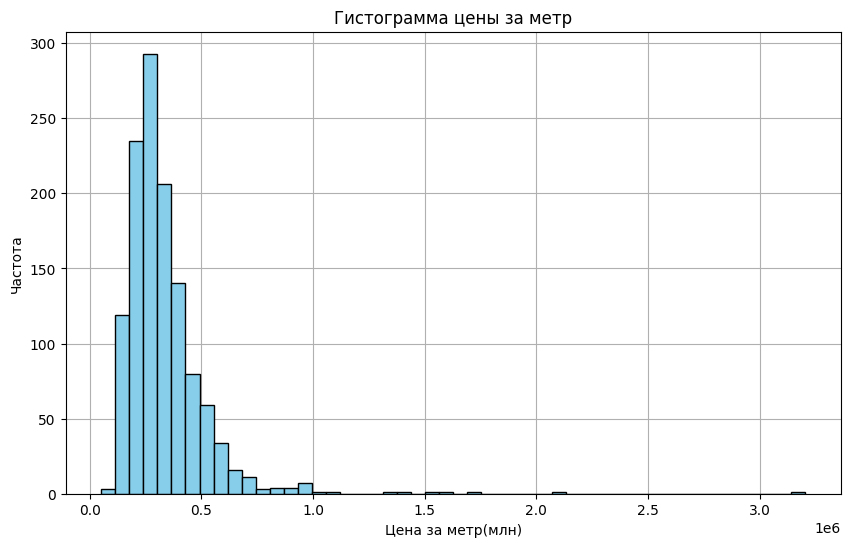

In [360]:
plt.figure(figsize=(10, 6))
df['Цена за метр'].hist(bins=50, color='skyblue', edgecolor='black')
axis = plt.gca()
axis.set_axisbelow(True)
plt.xlabel('Цена за метр(млн)')
plt.ylabel('Частота')
plt.title('Гистограмма цены за метр')
plt.show()

**Гистограмма распределения времени до метро**

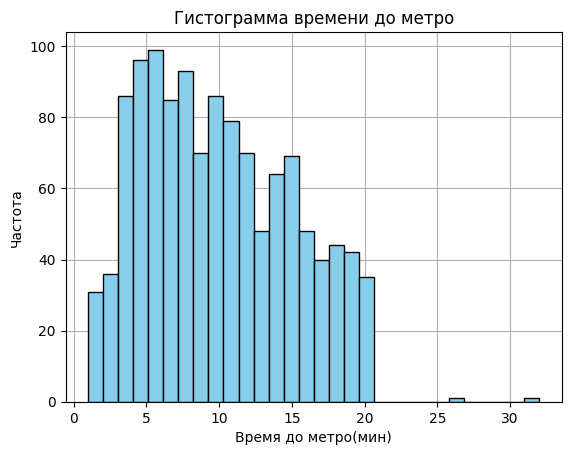

In [361]:
df['Время до метро(мин)'].hist(bins=30, color='skyblue', edgecolor='black')
axis = plt.gca()
axis.set_axisbelow(True)
plt.xlabel('Время до метро(мин)')
plt.ylabel('Частота')
plt.title('Гистограмма времени до метро')
plt.show()

**Зависимость цены от времени до метро**

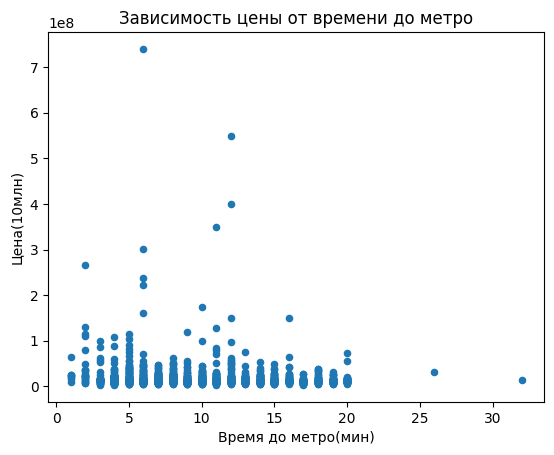

In [362]:
df.plot(x='Время до метро(мин)', y='Цена', kind='scatter')
plt.xlabel('Время до метро(мин)')
plt.ylabel('Цена(10млн)')
plt.title('Зависимость цены от времени до метро')
plt.show()

Мы обнаружили выбросы в "Цена за метр", это значения более 3млн. за метр
Похожая ситуация и с "Цена", наблюдаются выбросы при цене от 350млн за квартиру
Удостоверимся в наших высказывания и удалим выбросы

In [363]:
df['Цена'].sort_values().tail(10)

927     160000000
1226    175000000
1084    222000000
759     237044000
851     267000000
758     301200000
638     350000000
795     400000000
511     550000000
255     740000000
Name: Цена, dtype: int32

In [364]:
df['Цена за метр'].sort_values().tail(10)

773      994898
927     1056106
1031    1075000
758     1372835
759     1377362
795     1556420
1084    1574468
638     1750000
511     2075472
851     3205282
Name: Цена за метр, dtype: int32

In [365]:
df['Время до метро(мин)'].sort_values().tail(10)

449     20
800     20
798     20
501     20
540     20
42      20
889     20
398     20
145     26
1018    32
Name: Время до метро(мин), dtype: int32

In [366]:
df.drop(df[df['Цена'] >= 350000000]['Цена'].index, inplace = True)
df.drop(df[df['Цена за метр'] > 3000000]['Цена за метр'].index, inplace = True)
df.drop(df[df['Время до метро(мин)'] >= 26]['Время до метро(мин)'].index, inplace = True)

**Чтобы увидеть более подробную картину зависимости отберем квартиры до 60млн.**

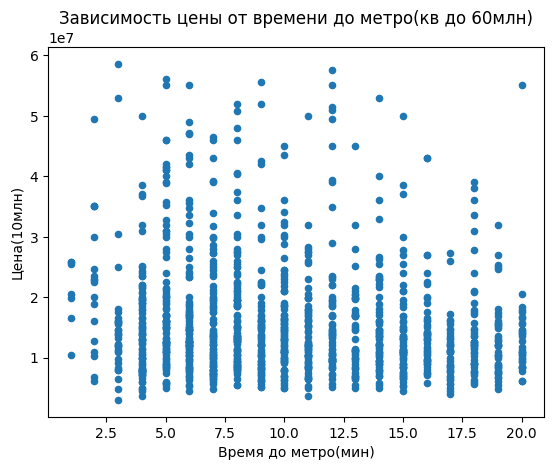

In [367]:
data = {'X' : df['Цена'][(df[df['Цена'] < 60000000].index)],
'Y' : df['Время до метро(мин)'][(df[df['Цена'] < 60000000].index)]}
data = pd.DataFrame(data)
data.plot(x='Y', y='X', kind='scatter')
plt.xlabel('Время до метро(мин)')
plt.ylabel('Цена(10млн)')
plt.title('Зависимость цены от времени до метро(кв до 60млн)')
plt.show()

**Зависимость цены за метр от этажа**

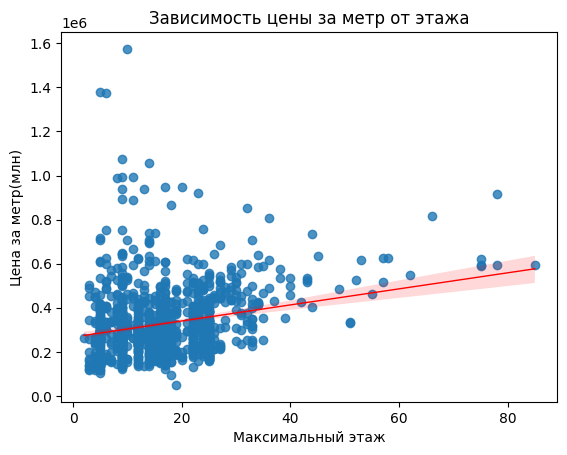

In [368]:
sns.regplot(x="Максимальный этаж", y="Цена за метр", data=df, line_kws={"color": "red", "linewidth": 1})
plt.xlabel('Максимальный этаж')
plt.ylabel('Цена за метр(млн)')
plt.title('Зависимость цены за метр от этажа')
plt.show()

**Построим корреляционную матрицу**

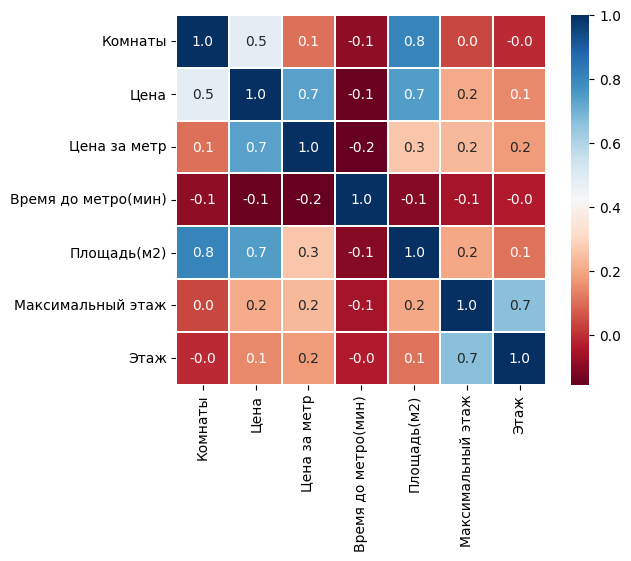

In [369]:
num_columns = df.select_dtypes(include=['int32', 'float32','int64', 'float64']).columns
sns.heatmap(df[num_columns].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");

Наблюдается естественная корреляция между площадью,ценой и количеством комнат.

In [370]:
round(df.loc[:, ('Цена', 'Цена за метр', 'Время до метро(мин)', 'Площадь(м2)')].describe(),2).astype(object)

,Цена,Цена за метр,Время до метро(мин),Площадь(м2)
count,1216.0,1216.0,1216.0,1216.0
mean,18882476.84,326747.34,10.17,54.43
std,20727117.49,153166.36,4.88,27.51
min,3000000.0,50000.0,1.0,11.0
25%,9700000.0,228762.25,6.0,37.7
50%,13500000.0,294115.5,10.0,46.2
75%,19900000.0,390702.5,14.0,64.1
max,301200000.0,1574468.0,20.0,219.4


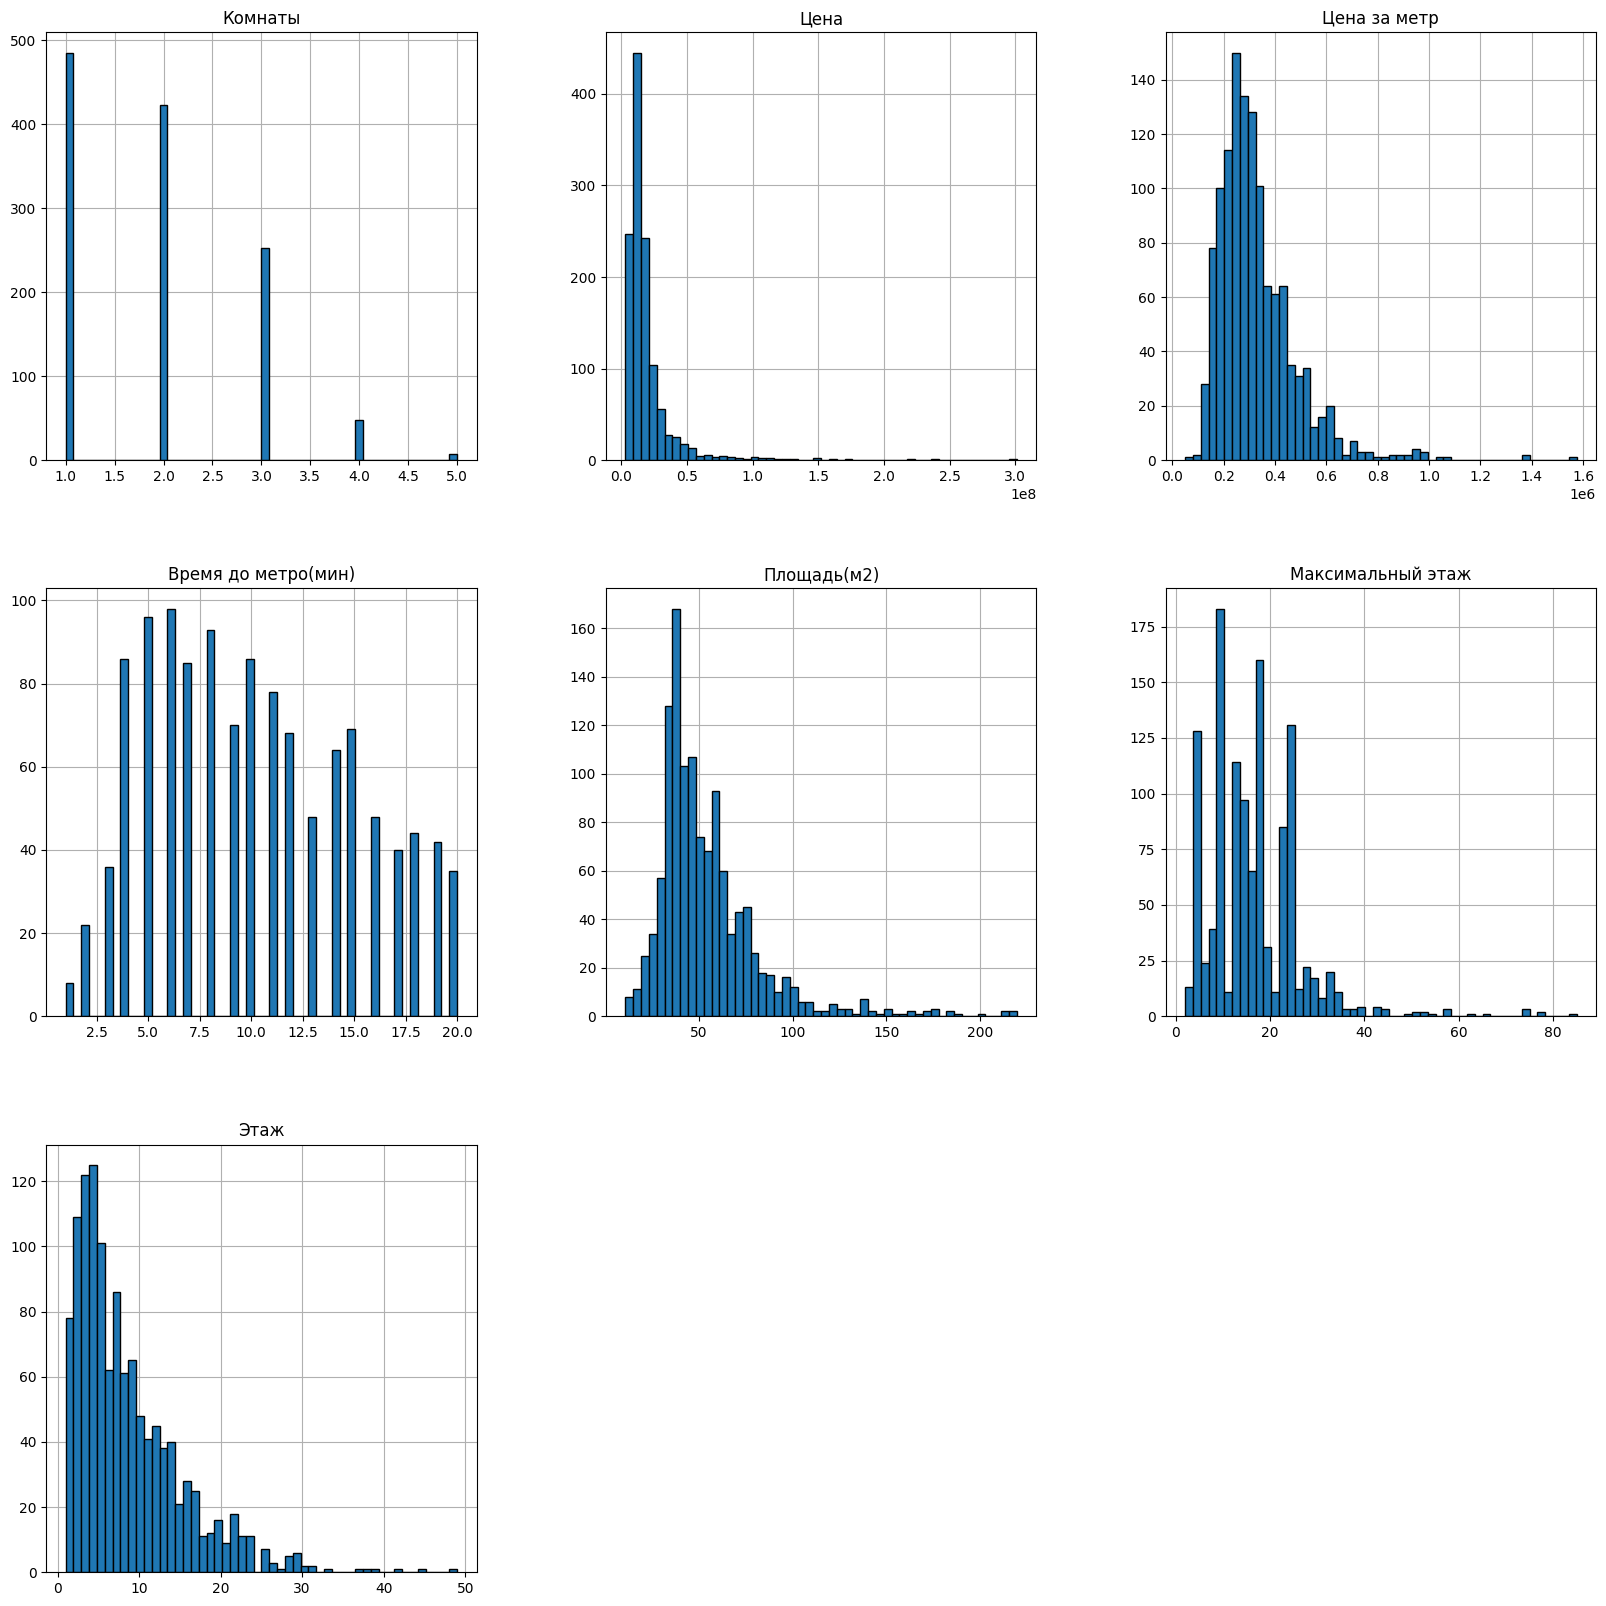

In [371]:
plt.rc('axes', axisbelow=True)
df[colom].hist(bins = 50, figsize = (20, 20), edgecolor='black')
plt.show()

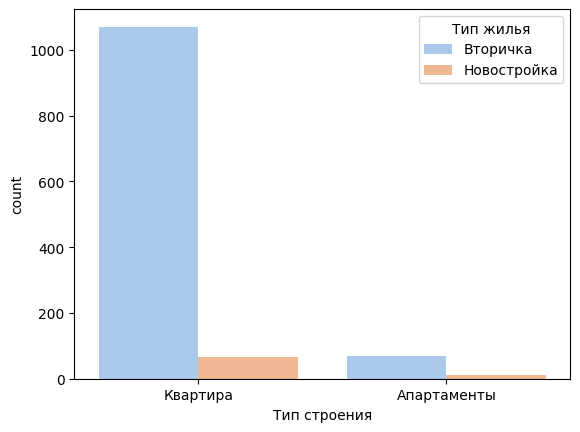

In [372]:
sns.countplot(x='Тип строения', hue = 'Тип жилья', data=df, palette='pastel' )
plt.show()

гипотеза, что однокомнатные на первых этажах

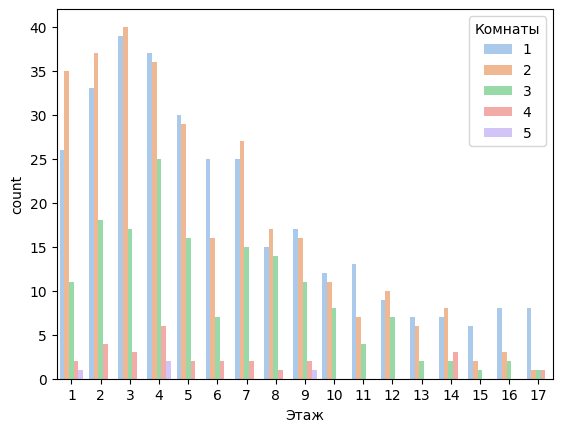

In [373]:
sns.countplot(x='Этаж', hue = 'Комнаты', data=df[df['Максимальный этаж']<=17], palette='pastel' )
plt.show()

популярность продажи квартир

<Axes: xlabel='Комнаты', ylabel='count'>

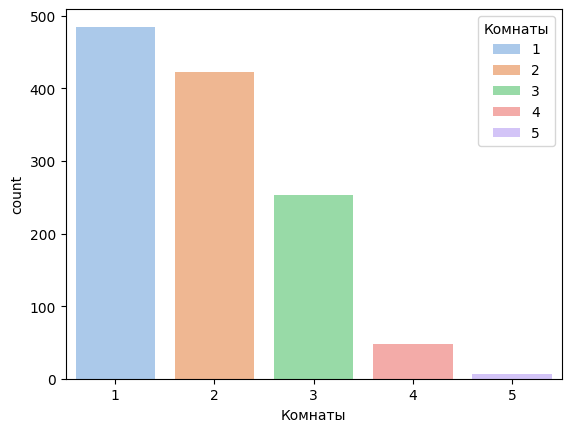

In [374]:
sns.countplot(x='Комнаты', hue = 'Комнаты', data=df, palette='pastel' )

# Создание новой переменной

Создадим новую переменную, которая будет отвечать за то находится ближайшее метро к объекту в ЦАО 

In [375]:
cao_metro = ['Рижская', 'Проспект Мира', 'Сухаревская', 'Тургеневская', 'Китай-город',
            'Третьяковская', 'Октябрьская' ,'Белорусская', 'аяковская', 'Тверская', 
            'Театральная', 'Новокузнецкая', 'Павелецкая','Площадь Ильича', 'Марксистская', 
            'Третьяковская' ,'Бауманская', 'Курская','Площадь Революции', 'Арбатская',
            'Смоленская' ,'Красносельская', 'Комсомольская', 'Красные Ворота',
            'Чистые Пруды', 'Лубянка', 'Охотный Ряд', 'Библиотека им Ленина',
            'Парк Культуры', 'Фрунзенская', 'Спортивная', 'Воробьевы Горы', 
            'Кропоткинская' ,'Смоленская', 'Арбатская', 'Александровский Сад', 
            'Проспект Мира', 'Комсомольская', 'Курская', 'Таганская', 'Павелецкая',
            'Добрынинская', 'Октябрьская', 'Парк Культуры', 'Краснопресненская', 'Белорусская',
            'Новослободская' ,'Улица 1905 года', 'Баррикадная', 'Пушкинская', 'Кузнецкий Мост',
            'Китай-город', 'Пролетарская', 'Таганская' ,'Менделеевская', 'Цветной Бульвар',
            'Чеховская', 'Боровицкая', 'Полянка', 'Серпуховская']
def metro(x):
    if x in cao_metro:
        return 1
    else:
        return 0 
df['ЦАО'] = df['Метро'].apply(metro)
df

,Комнаты,Цена,Цена за метр,Метро,Время до метро(мин),Площадь(м2),Максимальный этаж,Этаж,Тип строения,Тип жилья,ЦАО
0,2,27300000,446078,Полежаевская,17,61.2,27,17,Квартира,Вторичка,0
1,3,15400000,215385,Медведково,9,71.5,22,8,Квартира,Новостройка,0
2,2,8050000,180089,Левобережная,9,44.7,5,5,Квартира,Вторичка,0
3,2,19490000,382157,Багратионовская,7,51.0,17,3,Квартира,Вторичка,0
4,2,7000000,132827,Зеленоград — Крюково,6,52.7,9,7,Квартира,Вторичка,0
...,...,...,...,...,...,...,...,...,...,...,...
1222,4,26300000,274817,Кузьминки,14,95.7,23,4,Квартира,Вторичка,0
1223,1,5500000,179739,Фабричная,5,30.6,17,9,Квартира,Вторичка,0
1224,1,6600000,222222,Новокосино,15,29.7,25,16,Квартира,Вторичка,0
1225,2,22350000,397687,Белорусская,9,56.2,12,10,Квартира,Вторичка,1


In [376]:
df['Цена'].corr(df['ЦАО']).round(2)

0.32

In [377]:
df['Цена за комнату'] = df['Цена']/df['Комнаты']
df['Цена за комнату'] = df['Цена за комнату'].astype(int)
df

,Комнаты,Цена,Цена за метр,Метро,Время до метро(мин),Площадь(м2),Максимальный этаж,Этаж,Тип строения,Тип жилья,ЦАО,Цена за комнату
0,2,27300000,446078,Полежаевская,17,61.2,27,17,Квартира,Вторичка,0,13650000
1,3,15400000,215385,Медведково,9,71.5,22,8,Квартира,Новостройка,0,5133333
2,2,8050000,180089,Левобережная,9,44.7,5,5,Квартира,Вторичка,0,4025000
3,2,19490000,382157,Багратионовская,7,51.0,17,3,Квартира,Вторичка,0,9745000
4,2,7000000,132827,Зеленоград — Крюково,6,52.7,9,7,Квартира,Вторичка,0,3500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1222,4,26300000,274817,Кузьминки,14,95.7,23,4,Квартира,Вторичка,0,6575000
1223,1,5500000,179739,Фабричная,5,30.6,17,9,Квартира,Вторичка,0,5500000
1224,1,6600000,222222,Новокосино,15,29.7,25,16,Квартира,Вторичка,0,6600000
1225,2,22350000,397687,Белорусская,9,56.2,12,10,Квартира,Вторичка,1,11175000


# Машинное обучение

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn. model_selection import RepeatedKFold
from sklearn. linear_model import LassoCV
from sklearn.linear_model import LinearRegression

In [379]:
def metrica():
    print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
    print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))
    print("Test R2 = %.3f" % r2_score(y_test, y_pred))
    print("Train R2 = %.3f" % r2_score(y_train, y_train_pred))
    print("Test MAE = %.3f" % mean_absolute_error(y_test, y_pred))
    print("Train MAE = %.3f" % mean_absolute_error(y_train, y_train_pred))

необходимло убрать цао так как нет иных округов

In [380]:
X = pd.get_dummies(df, drop_first = True, dtype = int)
X.drop('ЦАО', axis=1, inplace=True)
y = df['Цена']
X

,Комнаты,Цена,Цена за метр,Время до метро(мин),Площадь(м2),Максимальный этаж,Этаж,Цена за комнату,Метро_Автозаводская,Метро_Академическая,...,Метро_Щербинка,Метро_Щукинская,Метро_Щёлковская,Метро_Электрозаводская,Метро_Юго-Западная,Метро_Южная,Метро_Ясенево,Метро_Яхромская,Тип строения_Квартира,Тип жилья_Новостройка
0,2,27300000,446078,17,61.2,27,17,13650000,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,15400000,215385,9,71.5,22,8,5133333,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2,8050000,180089,9,44.7,5,5,4025000,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,19490000,382157,7,51.0,17,3,9745000,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,7000000,132827,6,52.7,9,7,3500000,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,4,26300000,274817,14,95.7,23,4,6575000,0,0,...,0,0,0,0,0,0,0,0,1,0
1223,1,5500000,179739,5,30.6,17,9,5500000,0,0,...,0,0,0,0,0,0,0,0,1,0
1224,1,6600000,222222,15,29.7,25,16,6600000,0,0,...,0,0,0,0,0,0,0,0,1,0
1225,2,22350000,397687,9,56.2,12,10,11175000,0,0,...,0,0,0,0,0,0,0,0,1,0


In [381]:
X.shape

(1216, 275)

# Машинное обучение

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [383]:
normalizer = MinMaxScaler()
X_train_max = normalizer.fit_transform(X_train)
X_test_max = normalizer.transform(X_test)

In [399]:
model = Lasso().fit(X_train_max, y_train)

y_pred = model.predict(X_test_max)
y_train_pred = model.predict(X_train_max)

metrica()

Test MSE = 278763302.4120
Train MSE = 99925721.5033
Test R2 = 1.000
Train R2 = 1.000
Test MAE = 8009.781
Train MAE = 6014.830


In [385]:
alphas = np.arange(0,1,0.001)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1, verbose =10)
searcher.fit(X_train, y_train)

best_alpha_lasso = searcher.best_params_["alpha"]

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


In [386]:
best_alpha_lasso

0.054

In [403]:
model = Lasso(alpha = best_alpha_lasso).fit(X_train_max, y_train)

y_pred = model.predict(X_test_max)
y_train_pred = model.predict(X_train_max)

metrica()

Test MSE = 354275291.0426
Train MSE = 114419031.4071
Test R2 = 1.000
Train R2 = 1.000
Test MAE = 9307.486
Train MAE = 6440.925


In [397]:
cv = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state= 7 )
model = LassoCV(alphas = np.arange(0.01, 1, 0.01), cv=cv)
model.fit(X_train[X.columns], y_train, y_train)

y_pred = model.predict(X_test[X.columns])
y_train_pred = model.predict(X_train[X.columns])

metrica()

Test MSE = 25.5172
Train MSE = 13.8500
Test R2 = 1.000
Train R2 = 1.000
Test MAE = 3.097
Train MAE = 2.774


In [401]:
model = LinearRegression()
model.fit(X_train[X.columns], y_train)

y_pred = model.predict(X_test[X.columns])
y_train_pred = model.predict(X_train[X.columns])

metrica()

Test MSE = 0.0000
Train MSE = 0.0000
Test R2 = 1.000
Train R2 = 1.000
Test MAE = 0.000
Train MAE = 0.000


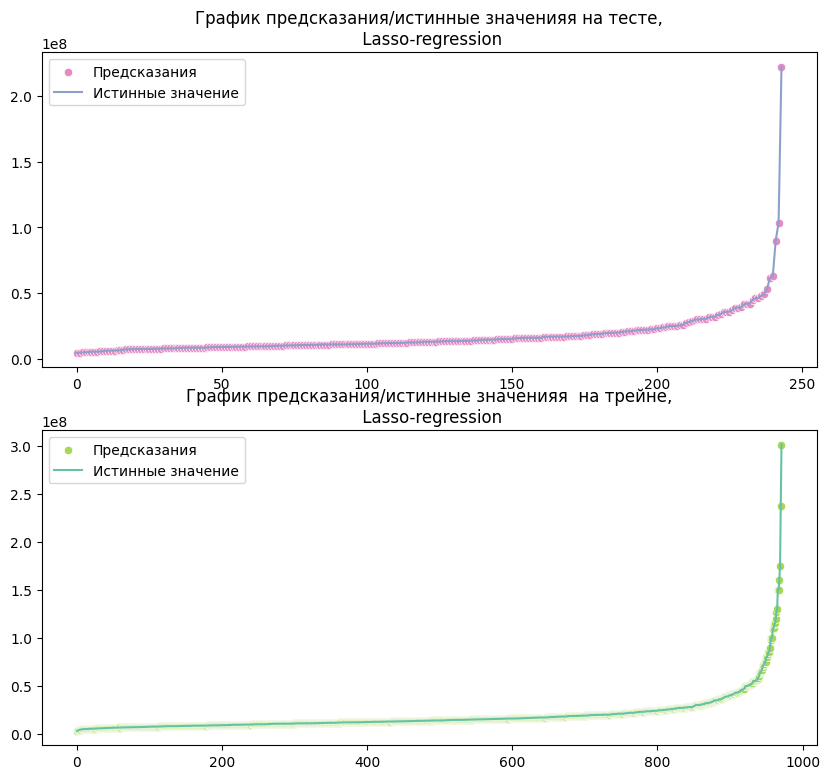

Test MSE = 354275291.0426
Train MSE = 114419031.4071
Test R2 = 1.000
Train R2 = 1.000
Test MAE = 9307.486
Train MAE = 6440.925


In [405]:
sort_mask_train = np.argsort(y_train.to_numpy())
sort_mask_test = np.argsort(y_test.to_numpy())

colors = sns.color_palette('Set2', 5)

plt.figure(figsize = (10,9))

plt.subplot(2,1,1)
plt.title('График предсказания/истинные значенияя на тесте,\n Lasso-regression')
sns.scatterplot(x = range(len(y_pred)), y = y_pred[sort_mask_test], color = colors[3], label = 'Предсказания')
sns.lineplot(x = range(len(y_test)), y = y_test.to_numpy()[sort_mask_test], 
             color = colors[2], label = 'Истинные значение')

plt.subplot(2,1,2)
plt.title('График предсказания/истинные значенияя  на трейне,\n Lasso-regression')
sns.scatterplot(x = range(len(y_train_pred)), y = y_train_pred[sort_mask_train], color = colors[4], label = 'Предсказания')
sns.lineplot(x = range(len(y_train)), y = y_train.to_numpy()[sort_mask_train], color = colors[0], label = 'Истинные значение')

plt.legend()
plt.show()
metrica()

# Машинное обучение

In [407]:
from sklearn.preprocessing import MinMaxScaler

X_dum = pd.get_dummies(X, drop_first=True)
X_dum.head()
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)
sort_mask_train = np.argsort(y_train.to_numpy())
sort_mask_test = np.argsort(y_test.to_numpy())
print(f'Количество признаков до кодирования: {X.shape[1]}')
print(f'Количество признаков после кодирования: {X_dum.shape[1]}')
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


model = Lasso().fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)
y_train_pred = model.predict(X_train_norm)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print("Train R_2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R_2 = %.4f" % r2_score(y_test, y_pred))

Количество признаков до кодирования: 275
Количество признаков после кодирования: 275
Test MSE = 278763302.4120
Train MSE = 99925721.5033
Train R_2 = 1.0000
Test R_2 = 1.0000


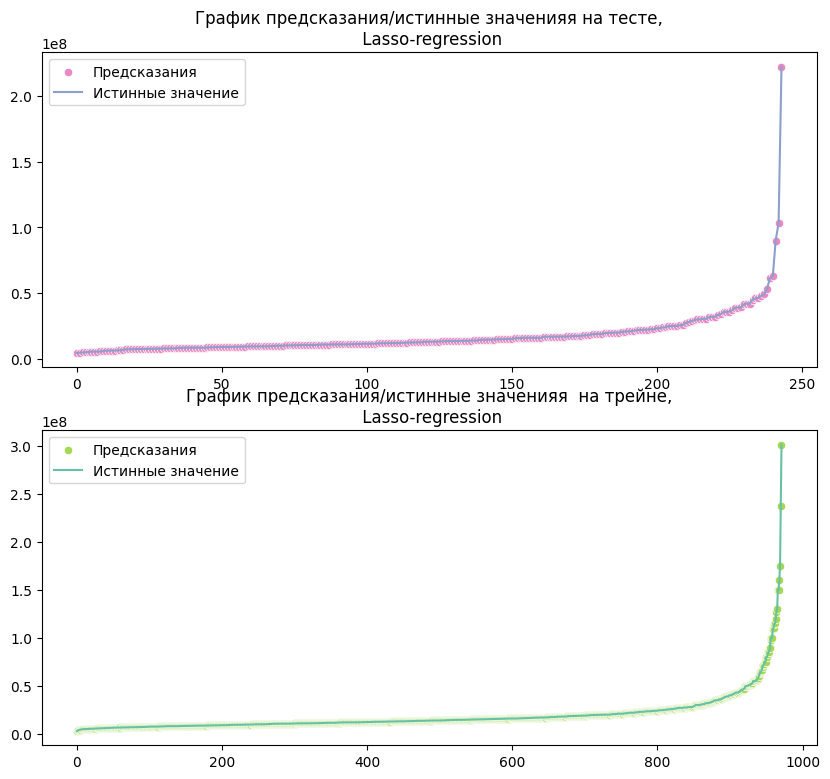

In [408]:
colors = sns.color_palette('Set2', 5)

plt.figure(figsize = (10,9))

plt.subplot(2,1,1)
plt.title('График предсказания/истинные значенияя на тесте,\n Lasso-regression')
sns.scatterplot(x = range(len(y_pred)), y = y_pred[sort_mask_test], color = colors[3], label = 'Предсказания')
sns.lineplot(x = range(len(y_test)), y = y_test.to_numpy()[sort_mask_test], 
             color = colors[2], label = 'Истинные значение')

plt.subplot(2,1,2)
plt.title('График предсказания/истинные значенияя  на трейне,\n Lasso-regression')
sns.scatterplot(x = range(len(y_train_pred)), y = y_train_pred[sort_mask_train], color = colors[4], label = 'Предсказания')
sns.lineplot(x = range(len(y_train)), y = y_train.to_numpy()[sort_mask_train], color = colors[0], label = 'Истинные значение')

plt.legend()
plt.show()